In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


df = pd.read_csv(r"D:\Projects\Project_Data_mining\marketing_campaign.csv", sep="\t")

print("\n===== First 5 Rows =====")
print(df.head())
print("\n===== Last 5 Rows =====")
print(df.tail())

print("\n===== Dataset Info =====")
print(df.info())

print("\n===== Descriptive Statistics =====")
print(df.describe(include='all'))



===== First 5 Rows =====
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  C

In [2]:

# -------------------------
# 2. Dataset shape
# -------------------------
print("\n===== Dataset Shape =====")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\n===== Checking Missing Values Before Dropping =====")
missing_per_column = df.isnull().sum()
total_missing = missing_per_column.sum()
print(f"\nTotal missing values in dataset: {total_missing}")

missing_percentage = (missing_per_column / df.shape[0]) * 100
missing_df = pd.DataFrame({
    "Missing Values": missing_per_column,
    "Percentage (%)": missing_percentage.round(2)
})
print("\nMissing values per column with percentage:")
print(missing_df)



===== Dataset Shape =====
Rows: 2240
Columns: 29

===== Checking Missing Values Before Dropping =====

Total missing values in dataset: 24

Missing values per column with percentage:
                     Missing Values  Percentage (%)
ID                                0            0.00
Year_Birth                        0            0.00
Education                         0            0.00
Marital_Status                    0            0.00
Income                           24            1.07
Kidhome                           0            0.00
Teenhome                          0            0.00
Dt_Customer                       0            0.00
Recency                           0            0.00
MntWines                          0            0.00
MntFruits                         0            0.00
MntMeatProducts                   0            0.00
MntFishProducts                   0            0.00
MntSweetProducts                  0            0.00
MntGoldProds                      0 

In [3]:

# -------------------------
# 3. Dropping rows with any null value (as in original)
# -------------------------
print("\n===== Dropping Rows with Null Values =====")
df = df.dropna()
missing_after_drop = df.isnull().sum().sum()
print(f"Total missing values after dropping rows: {missing_after_drop}")

print("\n===== Checking Dataset Shape After Dropping =====")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")



===== Dropping Rows with Null Values =====
Total missing values after dropping rows: 0

===== Checking Dataset Shape After Dropping =====
Rows: 2216
Columns: 29


In [4]:

# -------------------------
# 4. Data types and categorical value checks
# -------------------------
print("===== Data Types and Format Consistency =====\n")
print("Data types of each column:")
print(df.dtypes)

print("\nChecking categorical columns consistency (unique values):")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\nColumn '{col}' - {len(unique_values)} unique values:")
    print(unique_values[:10], "...")  # first 10 only

print("\nChecking numeric columns consistency:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna().sum()
    print(f"Column '{col}' - non-numeric values count: {non_numeric}")


===== Data Types and Format Consistency =====

Data types of each column:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Checking cat

In [5]:

# -------------------------
# 5. Create Age column from Year_Birth safely
# -------------------------
df.loc[:, 'Age'] = 2025 - df['Year_Birth']
print("\nAdded 'Age' column (2025 - Year_Birth).")
print(df[['Year_Birth', 'Age']].head())



Added 'Age' column (2025 - Year_Birth).
   Year_Birth  Age
0        1957   68
1        1954   71
2        1965   60
3        1984   41
4        1981   44


In [6]:
# -------------------------
# 6. Date Conversion & Feature Engineering
# -------------------------
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Create Tenure (Days since customer joined)
# Using the max date in dataset as reference
max_date = df['Dt_Customer'].max()
df['Tenure'] = (max_date - df['Dt_Customer']).dt.days

print("\n===== Date Conversion & Tenure =====")
print(df[['Dt_Customer', 'Tenure']].head())



===== Date Conversion & Tenure =====
  Dt_Customer  Tenure
0  2012-09-04     663
1  2014-03-08     113
2  2013-08-21     312
3  2014-02-10     139
4  2014-01-19     161


In [7]:
# -------------------------
# 7. Categorical Cleaning
# -------------------------
# Simplify Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Absurd': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone',
    'Divorced': 'Alone',
    'Single': 'Alone'
})

print("\n===== Marital Status Distribution after Cleaning =====")
print(df['Marital_Status'].value_counts())



===== Marital Status Distribution after Cleaning =====
Marital_Status
Partner    1430
Alone       786
Name: count, dtype: int64


In [8]:
# -------------------------
# 8. Outlier Handling
# -------------------------
# Age < 100
df = df[df['Age'] < 100]
# Income < 600000
df = df[df['Income'] < 600000]

print("\n===== Shape after removing outliers =====")
print(df.shape)



===== Shape after removing outliers =====
(2212, 31)


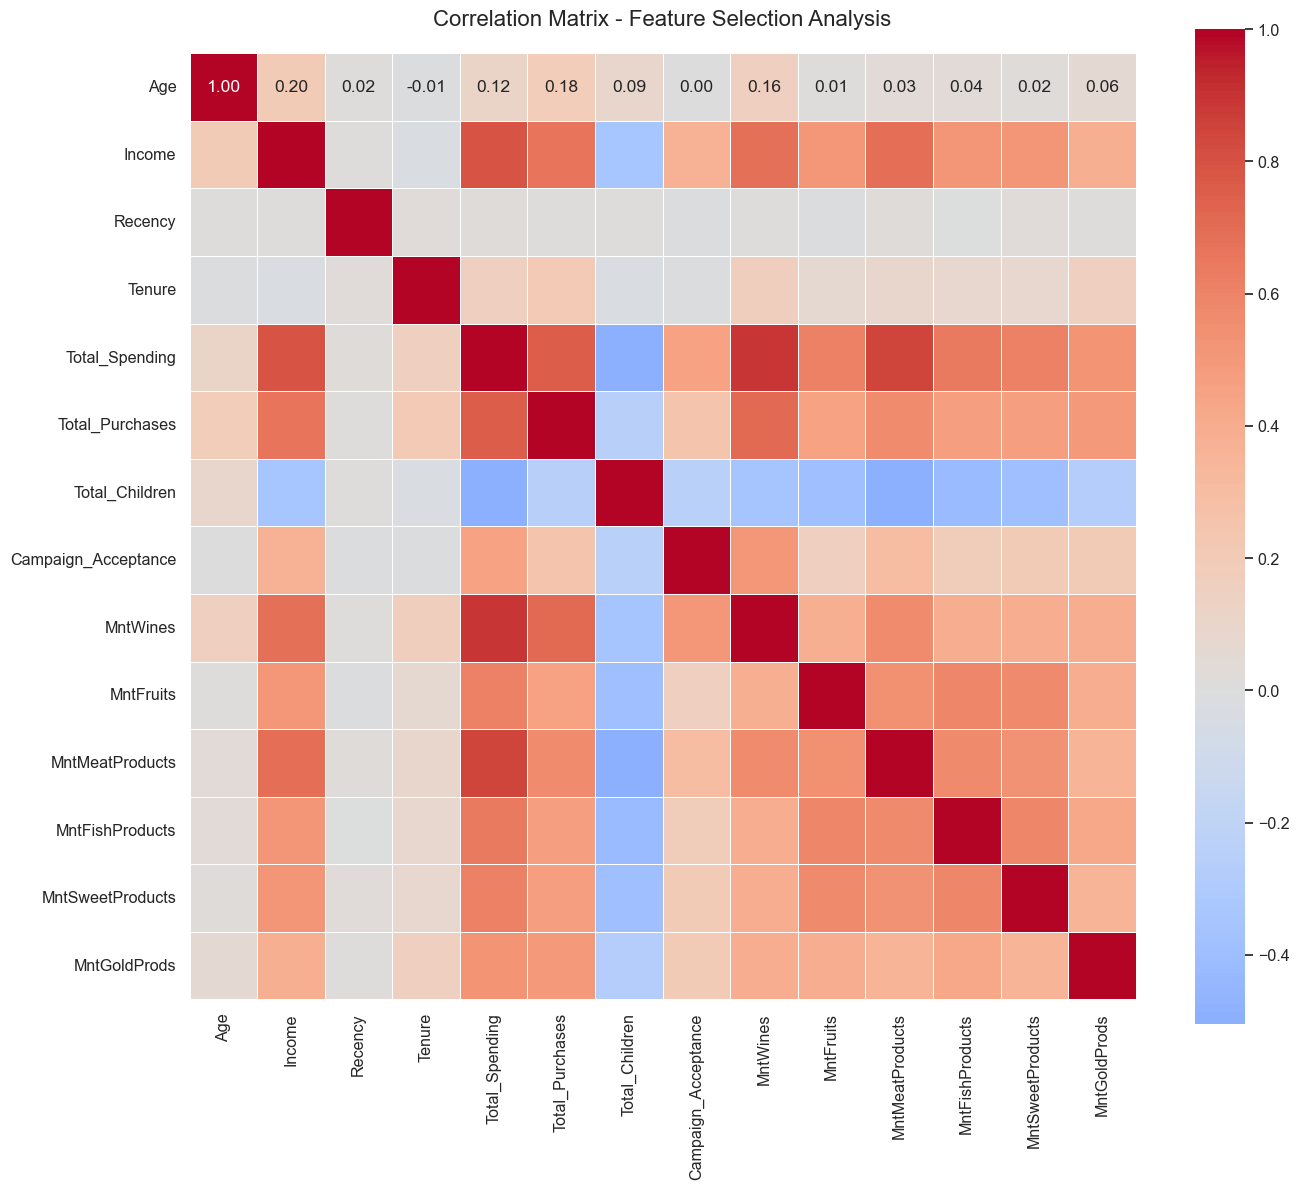


===== Highly Correlated Features (|r| > 0.8) =====
Total_Spending <-> MntWines: 0.893
Total_Spending <-> MntMeatProducts: 0.846


In [23]:
# -------------------------
# 11. Correlation Analysis
# -------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# تحديد الميزات الرقمية للتحليل
numeric_cols_for_analysis = ['Age', 'Income', 'Recency', 'Tenure',
                             'Total_Spending', 'Total_Purchases', 
                             'Total_Children', 'Campaign_Acceptance',
                             'MntWines', 'MntFruits', 'MntMeatProducts',
                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# حساب مصفوفة الارتباط
correlation_matrix = df[numeric_cols_for_analysis].corr()

# رسم heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Feature Selection Analysis', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# إيجاد الميزات المرتبطة بشدة (> 0.8)
print("\n===== Highly Correlated Features (|r| > 0.8) =====")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            pair = (correlation_matrix.columns[i], 
                   correlation_matrix.columns[j], 
                   correlation_matrix.iloc[i, j])
            high_corr_pairs.append(pair)
            print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

if not high_corr_pairs:
    print("No highly correlated feature pairs found.")


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


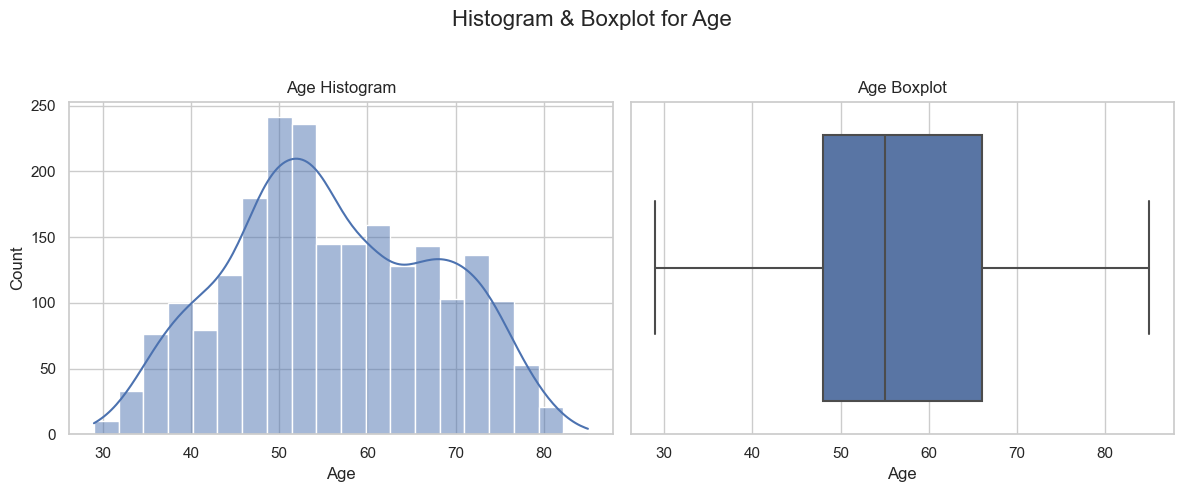


[Explanation] عرضنا التوزيع والـboxplot لـ'Age' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


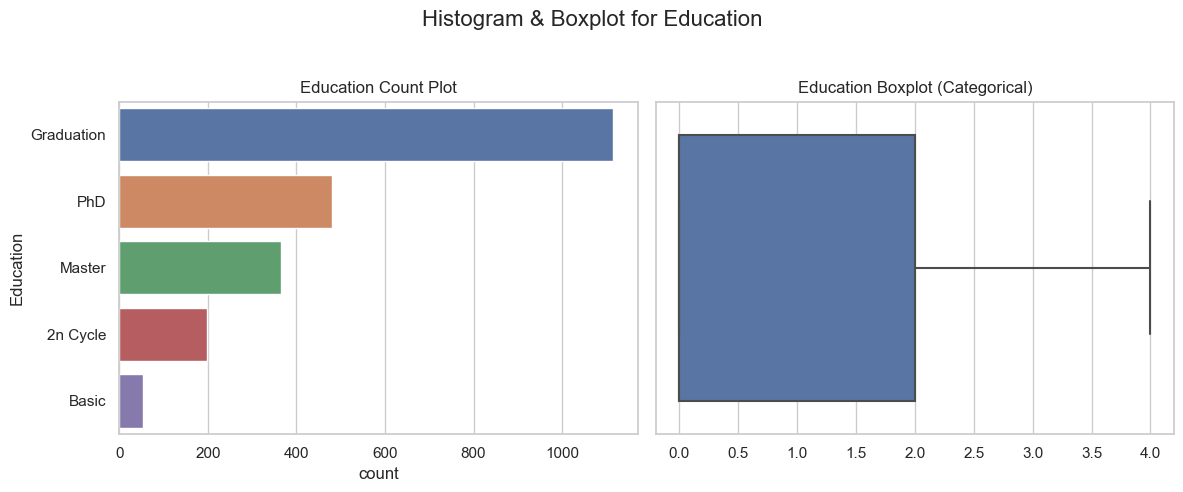


[Explanation] عرضنا التوزيع والـboxplot لـ'Education' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


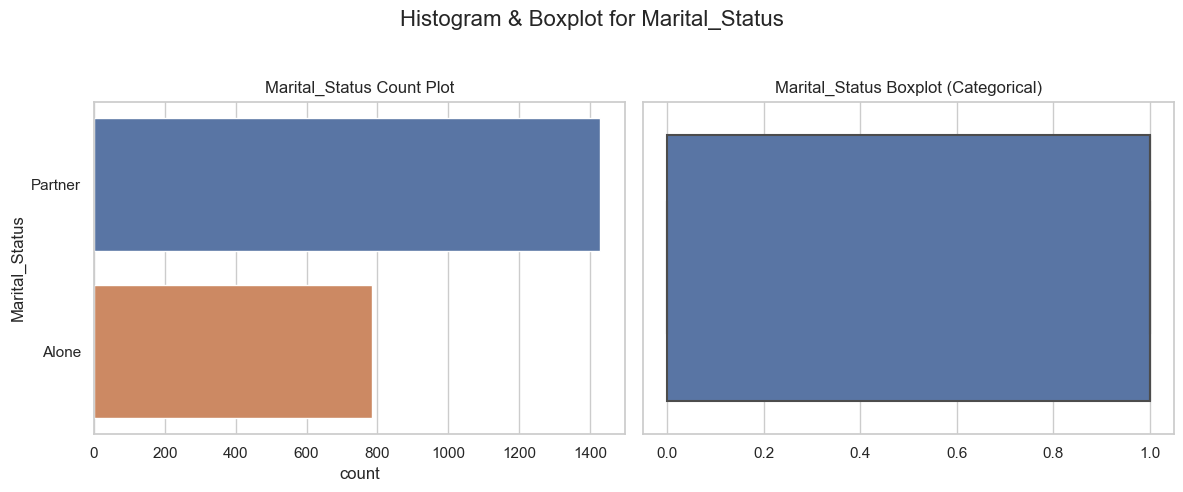


[Explanation] عرضنا التوزيع والـboxplot لـ'Marital_Status' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


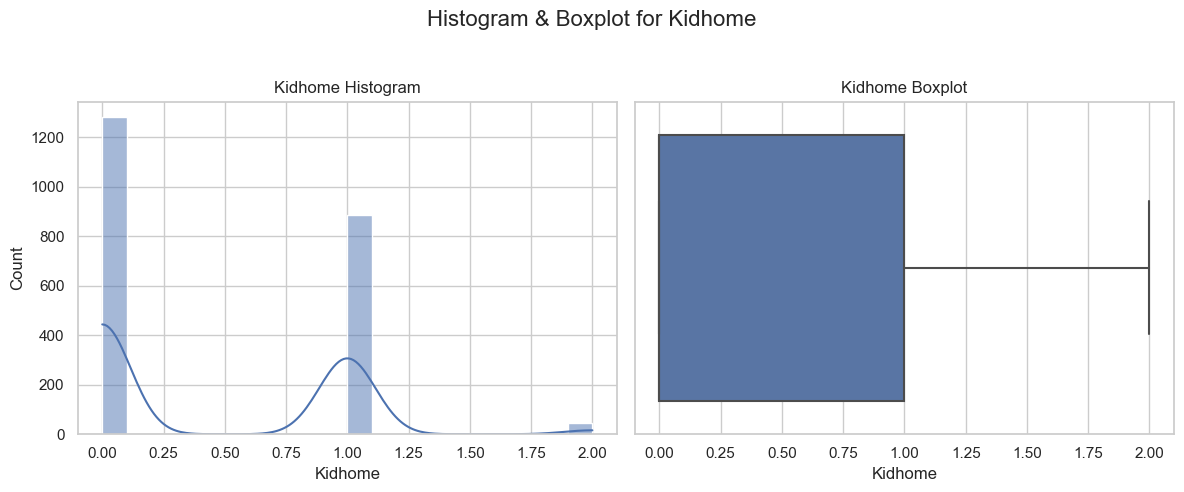


[Explanation] عرضنا التوزيع والـboxplot لـ'Kidhome' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


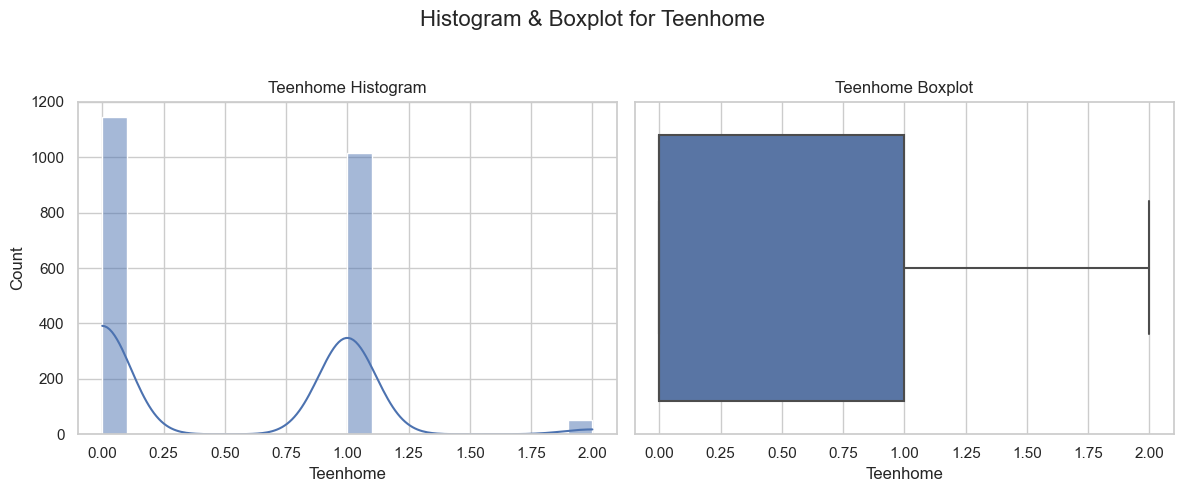


[Explanation] عرضنا التوزيع والـboxplot لـ'Teenhome' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


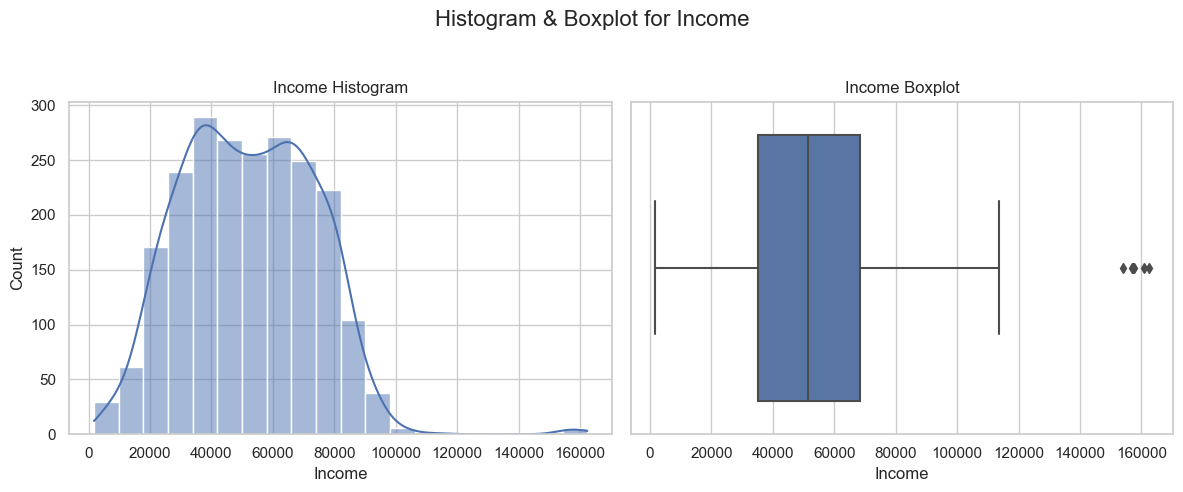


[Explanation] عرضنا التوزيع والـboxplot لـ'Income' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.


In [24]:

# -------------------------
# 6. Exploratory visualizations for demographic features
# -------------------------
demographic_cols = ['Age', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Income']

sns.set(style="whitegrid")

for col in demographic_cols:
    plt.figure(figsize=(12,5))
    plt.suptitle(f"Histogram & Boxplot for {col}", fontsize=16)
    
    if col in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.subplot(1,2,1)
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"{col} Histogram")
        plt.xlabel(col)
        plt.ylabel("Count")
        
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"{col} Boxplot")
    else:
        plt.subplot(1,2,1)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"{col} Count Plot")
        
        plt.subplot(1,2,2)
        sns.boxplot(x=pd.factorize(df[col])[0])
        plt.title(f"{col} Boxplot (Categorical)")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Explanation printed after each figure
    print(f"\n[Explanation] عرضنا التوزيع والـboxplot لـ'{col}' لنتعرف على التشتت، القيم المتطرفة (outliers)، وطبيعة التوزيع — مفيد لاختيار طرق المعالجة أو التكتل لاحقًا.")


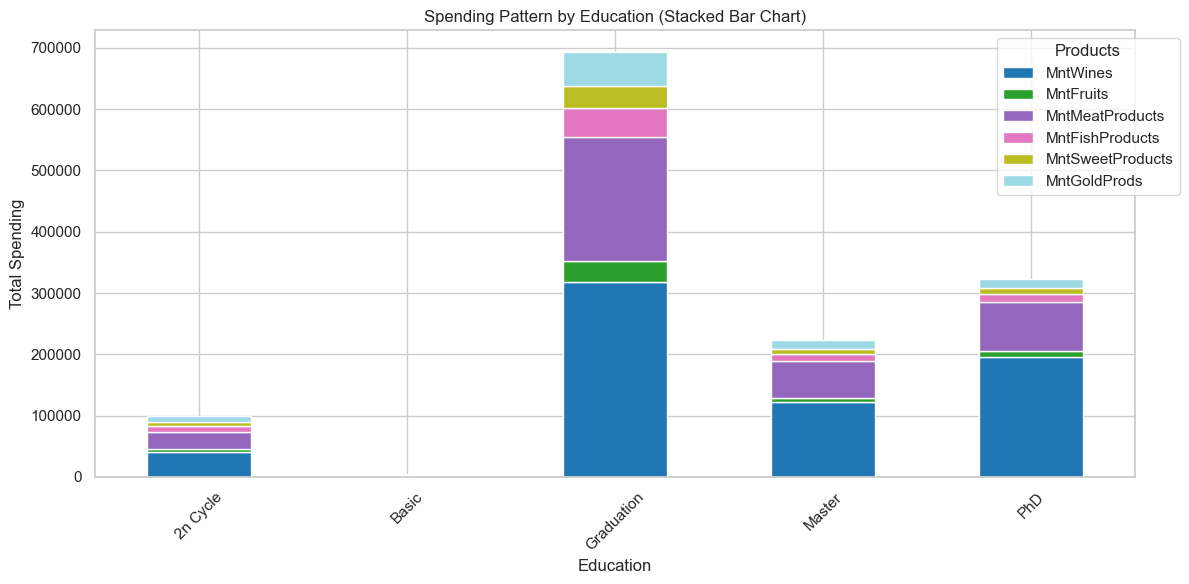


[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من 'Education' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.


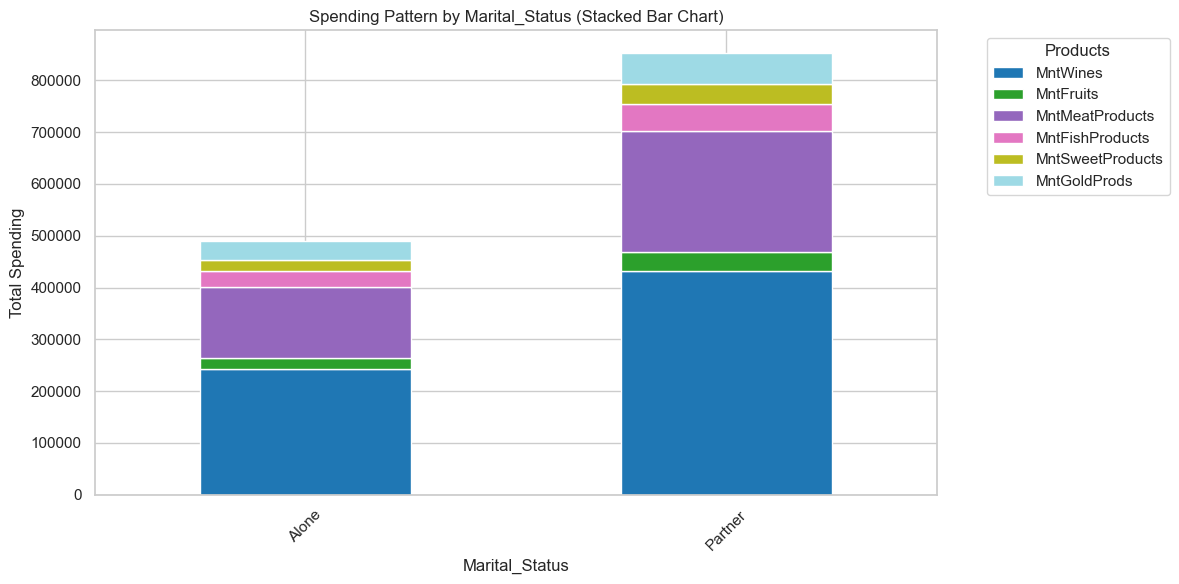


[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من 'Marital_Status' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.


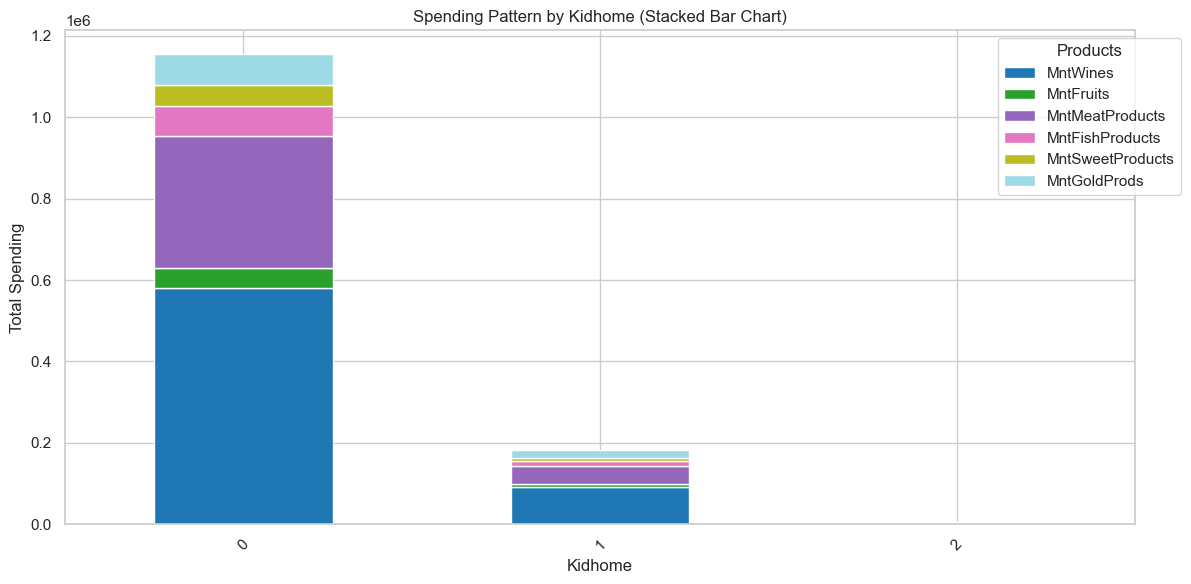


[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من 'Kidhome' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.


In [25]:

# -------------------------
# 7. Spending pattern stacked bar charts
# -------------------------
spending_cols = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

category_cols = ['Education', 'Marital_Status', 'Kidhome']

for category in category_cols:
    grouped = df.groupby(category)[spending_cols].sum()
    ax = grouped.plot(
        kind='bar', stacked=True, figsize=(12,6), colormap='tab20'
    )
    plt.title(f"Spending Pattern by {category} (Stacked Bar Chart)")
    plt.ylabel("Total Spending")
    plt.xlabel(category)
    plt.xticks(rotation=45)
    plt.legend(title="Products", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    print(f"\n[Explanation] المخططات المتكدسة تبين كيف يتوزع الإنفاق على فئات المنتجات داخل كل فئة من '{category}' — يساعد في فهم أي مجموعات تنفق أكثر وأين نستهدف الحملات.")


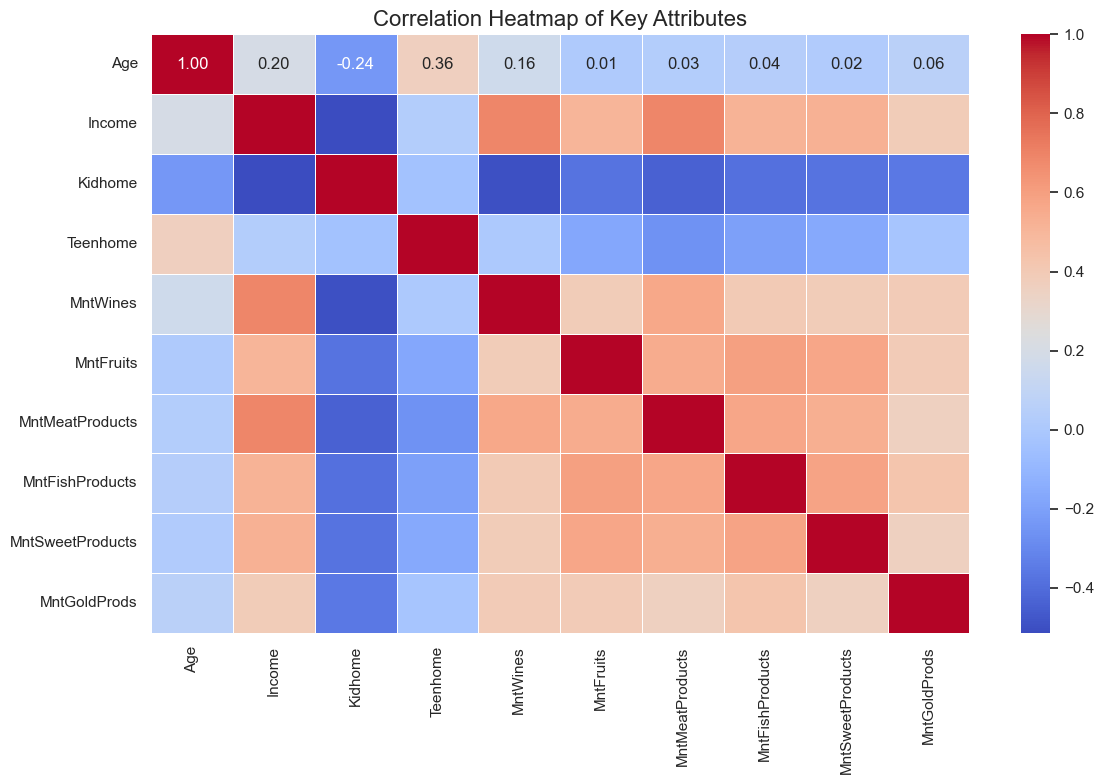


[Explanation] خريطة الارتباط تساعدنا نعرف العلاقات بين الخصائص (مثل هل الدخل مرتبط بكمية الإنفاق؟) قبل اختيار عدد الكلاسترز أو الميزات المهمة.


In [26]:

# -------------------------
# 8. Correlation heatmap of key numeric attributes
# -------------------------
# ensure Age exists (we already created it)
df.loc[:, 'Age'] = 2025 - df['Year_Birth']

key_numeric_cols = [
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

corr_matrix = df[key_numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key Attributes", fontsize=16)
plt.tight_layout()
plt.show()

# Explanation
print("\n[Explanation] خريطة الارتباط تساعدنا نعرف العلاقات بين الخصائص (مثل هل الدخل مرتبط بكمية الإنفاق؟) قبل اختيار عدد الكلاسترز أو الميزات المهمة.")


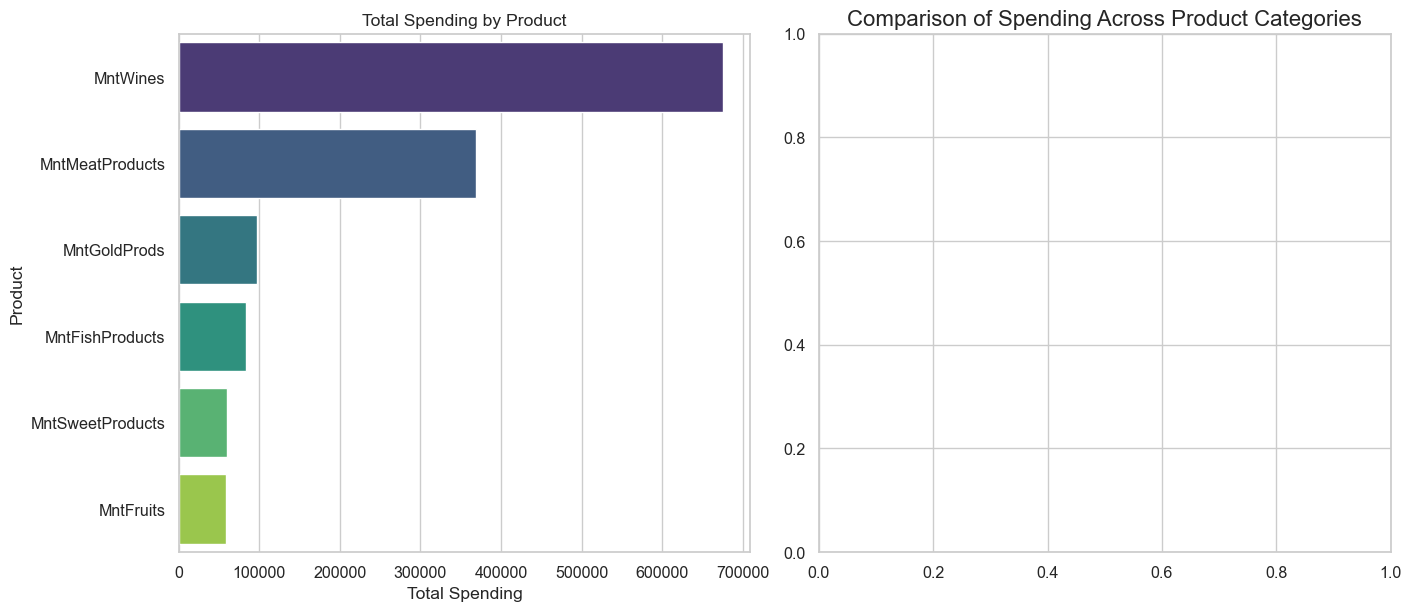

Saved figure: product_spending_comparison_en.png

Explanation:
- Left chart: total spending per product category (useful to identify high-revenue product groups).
- Right chart: average spending per customer per product category (useful to identify products with high per-customer spend).
- Use totals to prioritize revenue-generating categories and means to target high-engagement customers.


In [27]:
# -------------------------
# Product spending comparison (English labels + explanations)
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns

products = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]

# Total spending per product category
totals = df[products].sum().sort_values(ascending=False)

# Average spending per customer per product category
means = df[products].mean().sort_values(ascending=False)

sns.set(style='whitegrid', font_scale=1.05)
fig, axes = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)

# Bar chart for totals (horizontal for readability)
sns.barplot(x=totals.values, y=totals.index, palette='viridis', ax=axes[0])
axes[0].set_title('Total Spending by Product')
axes[0].set_xlabel('Total Spending')
axes[0].set_ylabel('Product')



plt.title('Comparison of Spending Across Product Categories', fontsize=16)
plt.show()

# Save the figure (optional)
fig.savefig('product_spending_comparison_en.png', dpi=150)
print("Saved figure: product_spending_comparison_en.png")

# Short English explanation to help readers interpret the charts
print("\nExplanation:")
print("- Left chart: total spending per product category (useful to identify high-revenue product groups).")
print("- Right chart: average spending per customer per product category (useful to identify products with high per-customer spend).")
print("- Use totals to prioritize revenue-generating categories and means to target high-engagement customers.")


In [28]:

# -------------------------
# 9. Build Correlation Explanation Table
# -------------------------
explanation_rows = []
for col1 in key_numeric_cols:
    for col2 in key_numeric_cols:
        if col1 != col2:
            corr_value = corr_matrix.loc[col1, col2]
            if corr_value > 0.7:
                relation = "Strong positive correlation"
            elif corr_value > 0.3:
                relation = "Moderate positive correlation"
            elif corr_value > 0:
                relation = "Weak positive correlation"
            elif corr_value < -0.7:
                relation = "Strong negative correlation"
            elif corr_value < -0.3:
                relation = "Moderate negative correlation"
            elif corr_value < 0:
                relation = "Weak negative correlation"
            else:
                relation = "No correlation"
            explanation_rows.append({
                "Attribute 1": col1,
                "Attribute 2": col2,
                "Correlation": round(corr_value, 2),
                "Interpretation": relation
            })

explanation_df = pd.DataFrame(explanation_rows)
print("\n===== Correlation Explanation Table =====\n")
print(explanation_df)

# Explanation
print("\n[Explanation] أنشأنا جدول يفسر العلاقات العددية بين الأزواج المختلفة لتسهيل التفسير التقني لأصحاب القرار.")



===== Correlation Explanation Table =====

     Attribute 1       Attribute 2  Correlation                 Interpretation
0            Age            Income         0.20      Weak positive correlation
1            Age           Kidhome        -0.24      Weak negative correlation
2            Age          Teenhome         0.36  Moderate positive correlation
3            Age          MntWines         0.16      Weak positive correlation
4            Age         MntFruits         0.01      Weak positive correlation
..           ...               ...          ...                            ...
85  MntGoldProds          MntWines         0.39  Moderate positive correlation
86  MntGoldProds         MntFruits         0.39  Moderate positive correlation
87  MntGoldProds   MntMeatProducts         0.36  Moderate positive correlation
88  MntGoldProds   MntFishProducts         0.43  Moderate positive correlation
89  MntGoldProds  MntSweetProducts         0.36  Moderate positive correlation

[90 row

In [33]:
# -------------------------
# 10. Handling Missing Values
# -------------------------

print("\nCheck missing per column (after previous operations):")
print(df.isnull().sum())

# Simple imputation (numeric mean, categorical mode)
#df.fillna(df.mean(numeric_only=True), inplace=True)
#df.fillna(df.mode().iloc[0], inplace=True)



Check missing per column (after previous operations):
ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Age                         0
Tenure                      0
Total_Spending 

In [34]:

# -------------------------
# 11. Creating new features
# -------------------------

df["Total_Spending"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"]
)

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Premium_Products"] = df["MntWines"] + df["MntMeatProducts"]

df["Age"] = 2025 - df["Year_Birth"]


df["Is_Parent"] = (df["Children"] > 0).astype(int)


df["Total_Accepted_Campaigns"] = (
    df["AcceptedCmp1"] +
    df["AcceptedCmp2"] +
    df["AcceptedCmp3"] +
    df["AcceptedCmp4"] +
    df["AcceptedCmp5"] +
    df["Response"]
)

df["Loyalty_Years"] = 2025 - pd.to_datetime(df["Dt_Customer"], dayfirst=True).dt.year


In [35]:

# -------------------------
# 12. ColumnTransformer with StandardScaler & OneHotEncoder
# -------------------------

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nNumeric columns to scale:", numeric_cols)
print("Categorical columns to encode:", categorical_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ]
   
)

# Fit-transform to get X ready for clustering/ML
X = preprocessor.fit_transform(df)

print("\nPreprocessing completed. 'X' is ready for clustering/ML algorithms.")
print(f"Resulting matrix shape: {X.shape}")



Numeric columns to scale: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Tenure', 'Total_Spending', 'Total_Purchases', 'Total_Children', 'Campaign_Acceptance', 'Children', 'Premium_Products', 'Total_Accepted_Campaigns']
Categorical columns to encode: ['Education', 'Marital_Status']

Preprocessing completed. 'X' is ready for clustering/ML algorithms.
Resulting matrix shape: (2212, 40)


d:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
